## Options for urban area calculations

### 1. Dry Bare Soil Index (DBSI)
DBSI values of >= 0.26 are bare surfaces otherwise (if terrestrial non-veg) artificial (urban) areas?

\begin{equation*}
DBSI=\frac{(SR_{swir1} - SR_{green})}{(SR_{swir1} + SR_{green})} - NDVI
\end{equation*}

\begin{equation*}
NDVI=\frac{(SR_{nir} - SR_{red})}{(SR_{nir} + SR_{red})}
\end{equation*}

In [2]:
import datacube
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datacube.storage import masking

dc = datacube.Datacube(app='urban_area')


In [137]:
# townsville
#lat = (-19.742, -18.743)
#lon = (146.292, 147.35)
#lat = (-19.5, -19)
#lon = (146.5, 147)
x=146.749732
y=-19.303877
# Cooryong
#x=147.904333
#y=-36.19

#bound=.05
bound=.25
lat = (y+bound, y-bound)
lon = (x+bound, x-bound)


In [138]:
# year
year = ('2015-01-01', '2015-12-01')

In [139]:
ls8_ds = dc.load(
    product='ls8_nbart_geomedian_annual', 
    x=lon,
    y=lat,
    resolution = (-25, 25),
    output_crs='epsg:3577',
    time=year
)

In [159]:
fc = dc.load(
    product='fc_percentile_albers_annual', 
    x=lon,
    y=lat,
    resolution = (-25, 25),
    output_crs='epsg:3577',
    time=year
)

In [161]:
lon, lat

((146.999732, 146.499732), (-19.053877, -19.553877))

In [140]:
ls8_ds

<xarray.Dataset>
Dimensions:  (time: 1, x: 2338, y: 2448)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01
  * y        (y) float64 -2.125e+06 -2.125e+06 -2.125e+06 -2.125e+06 ...
  * x        (x) float64 1.513e+06 1.513e+06 1.513e+06 1.513e+06 1.513e+06 ...
Data variables:
    blue     (time, y, x) int16 567 595 658 619 541 797 1257 975 908 802 787 ...
    green    (time, y, x) int16 736 776 850 788 739 1148 1867 1346 1147 1003 ...
    red      (time, y, x) int16 760 847 979 905 788 1328 2323 1496 1072 776 ...
    nir      (time, y, x) int16 2230 2477 2558 2444 2530 2898 3243 1520 705 ...
    swir1    (time, y, x) int16 1952 2301 2667 2406 2132 2864 3799 1172 346 ...
    swir2    (time, y, x) int16 1191 1396 1736 1579 1304 2091 3090 788 239 ...
Attributes:
    crs:      epsg:3577

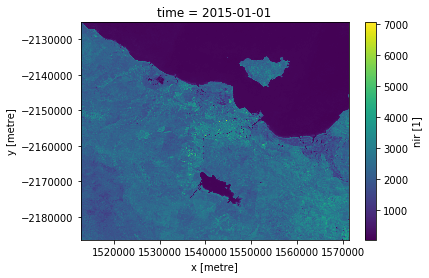

In [141]:
ls8_ds.nir.isel(time=0).plot.imshow()

In [142]:
ls8_ds = masking.mask_invalid_data(ls8_ds)

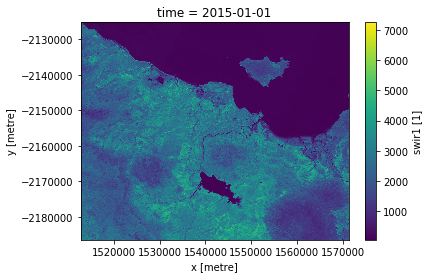

In [143]:
ls8_ds.swir1.isel(time=0).plot.imshow()

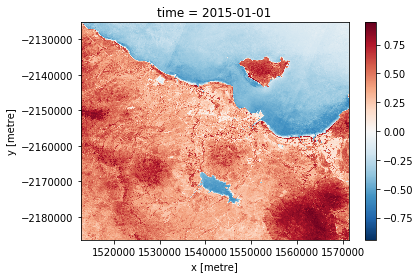

In [144]:
ndvi = (ls8_ds.nir - ls8_ds.red) / (ls8_ds.nir + ls8_ds.red)
ndvi = ndvi.isel(time=0)
ndvi.plot.imshow()

In [145]:
dbsi = ((ls8_ds.swir1 - ls8_ds.green) / (ls8_ds.swir1 + ls8_ds.green)) - ndvi
dbsi = dbsi.isel(time=0)
DBSI_bare = (dbsi > .26).astype(int)

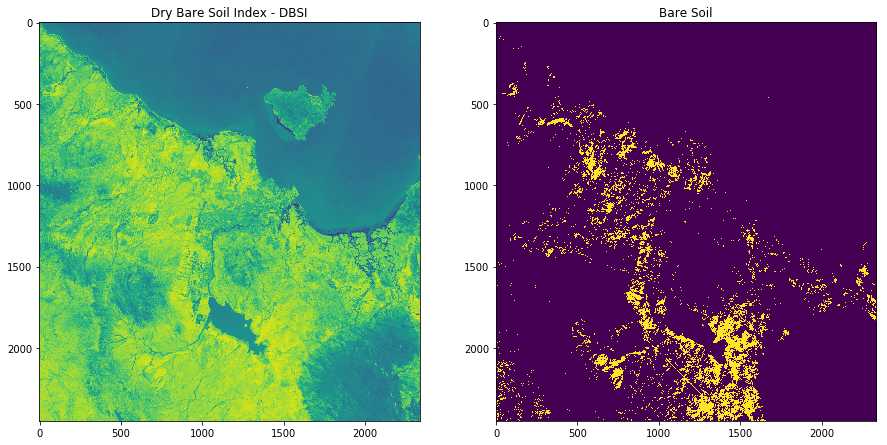

In [146]:
fig=plt.figure(figsize=(15, 15))
columns = 2
rows = 1
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Dry Bare Soil Index - DBSI')
ax.imshow(dbsi)

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Bare Soil')
ax1.imshow(DBSI_bare)
plt.show()

### 2. Normalized Difference Built-up Index NDBI


\begin{equation*}
NDBI_c=\frac{(band5 - band4)}{(band5 + band4)}
\end{equation*}

\begin{equation*}
BU_b = NDBI_b - NDVI_b
\end{equation*}


### 3. Median Absolute Deviation ???

In [147]:
ls8_mad = dc.load(
    product='ls8_nbart_tmad_annual', 
    x=lon,
    y=lat,
    resolution = (-25, 25),
    output_crs='epsg:3577',
    time=year
)

In [148]:
bc = ls8_mad.bcdev.isel(time=0)
euc = ls8_mad.edev.isel(time=0)
spec = ls8_mad.sdev.isel(time=0)

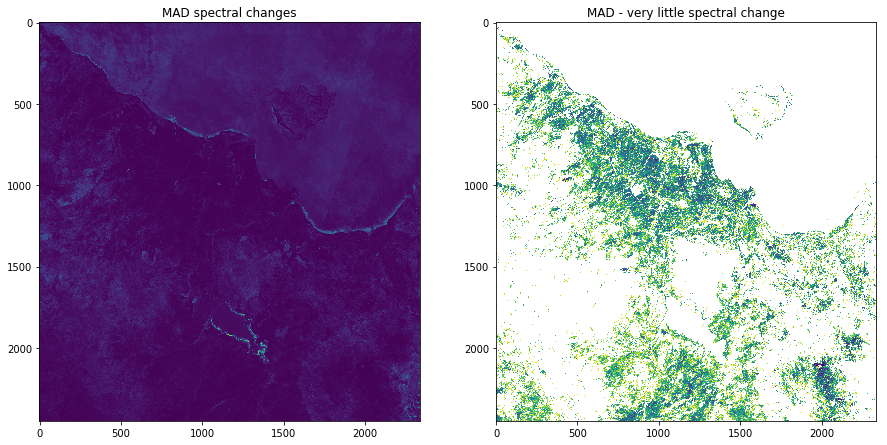

In [158]:
fig=plt.figure(figsize=(15, 15))
columns = 2
rows = 1
ax = fig.add_subplot(1, 2, 1)
ax.set_title("MAD spectral changes")
ax.imshow(spec)

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title("MAD - very little spectral change")
ax1.imshow(spec.where(spec < .002))
plt.show()

#### Least changing part of euclidean MAD

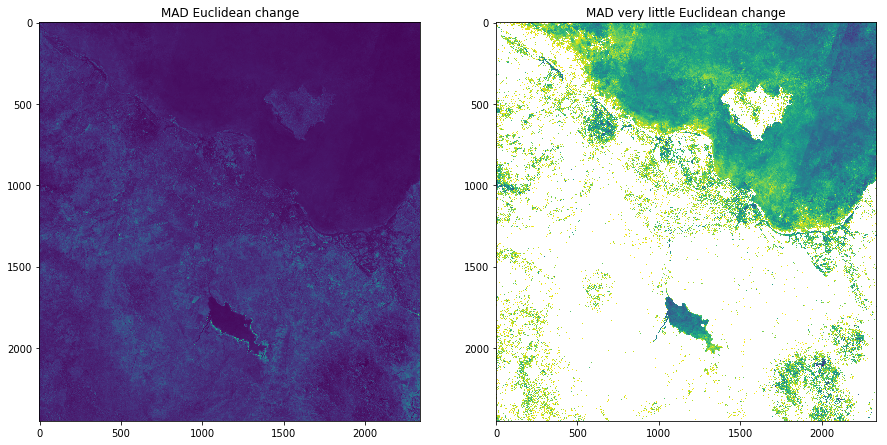

In [150]:
fig=plt.figure(figsize=(15, 15))
columns = 2
rows = 1
ax = fig.add_subplot(1, 2, 1)
ax.set_title("MAD Euclidean change")
ax.imshow(euc)
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title("MAD very little Euclidean change")
ax1.imshow(euc.where(euc < .04))
plt.show()


#### Least changing part of bc MAD

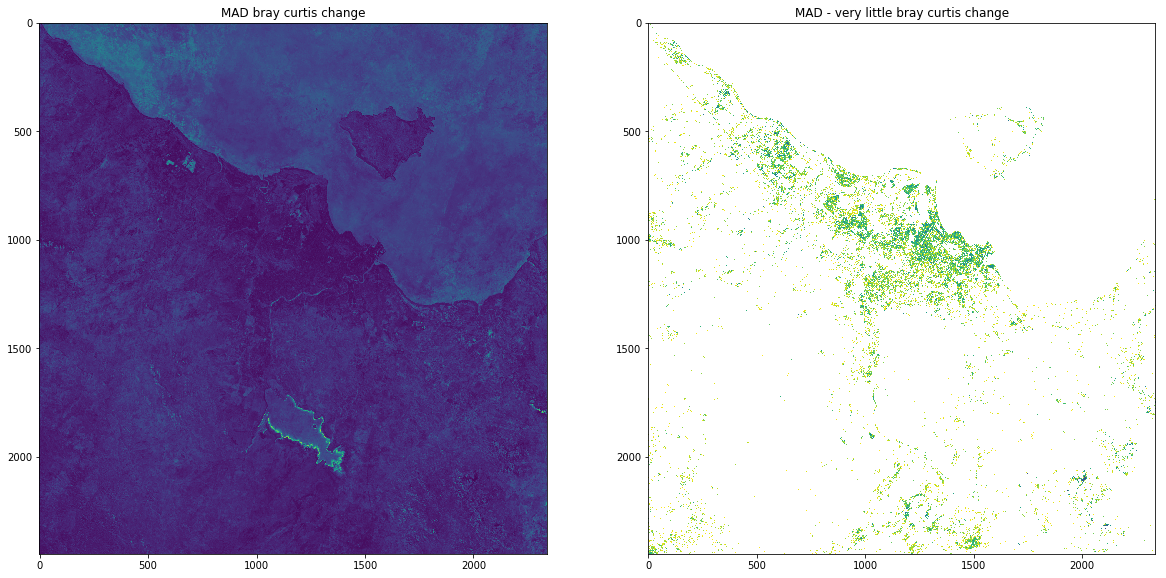

In [151]:
fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 1
ax = fig.add_subplot(1, 2, 1)
ax.set_title("MAD bray curtis change")
ax.imshow(bc)
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title("MAD - very little bray curtis change")
ax1.imshow(bc.where(bc < .04))
plt.show()


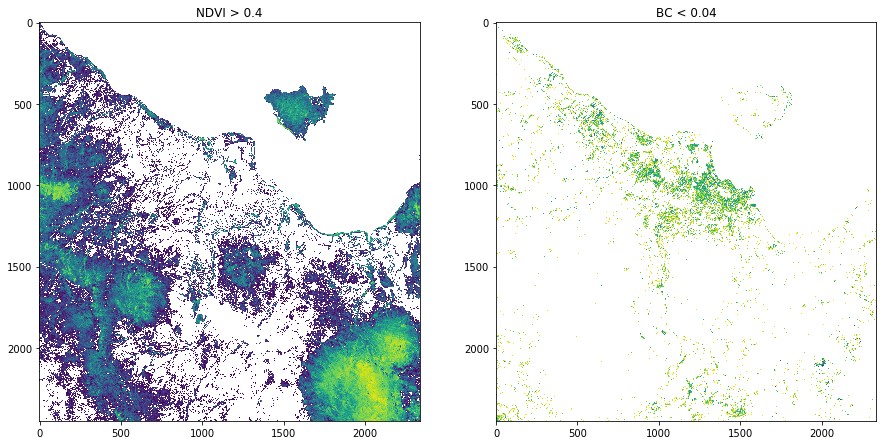

In [152]:
fig=plt.figure(figsize=(15, 15))
columns = 2
rows = 1
ax=fig.add_subplot(1, 2, 1)
ax.set_title("NDVI > 0.4")
ax.imshow(ndvi.where(ndvi > .4))
ax1=fig.add_subplot(1, 2, 2)
ax1.set_title("BC < 0.04")
ax1.imshow(bc.where(bc < .04))
plt.show()

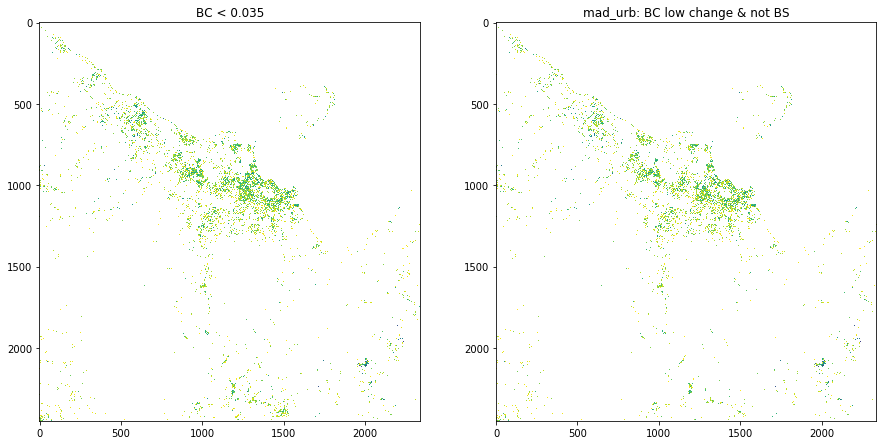

In [153]:
bc_lowChange=bc.where(bc < .035)
bc_urban = bc_lowChange.where(DBSI_bare < 1)

fig=plt.figure(figsize=(15, 15))
columns = 2
rows = 1
ax1=fig.add_subplot(1, 2, 1)
ax1.set_title("BC < 0.035")
ax1.imshow(bc_lowChange)
ax=fig.add_subplot(1, 2, 2)
ax.set_title("mad_urb: BC low change & not BS")
ax.imshow(bc_urban)

plt.show()

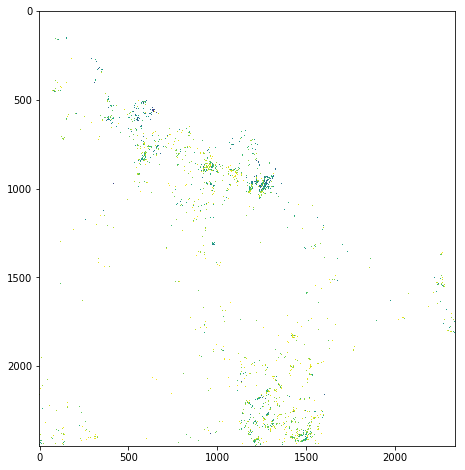

In [154]:
fig=plt.figure(figsize=(8, 8))
plt.imshow(((bc.where(bc < .04)) - DBSI_bare.where(DBSI_bare > 0)))

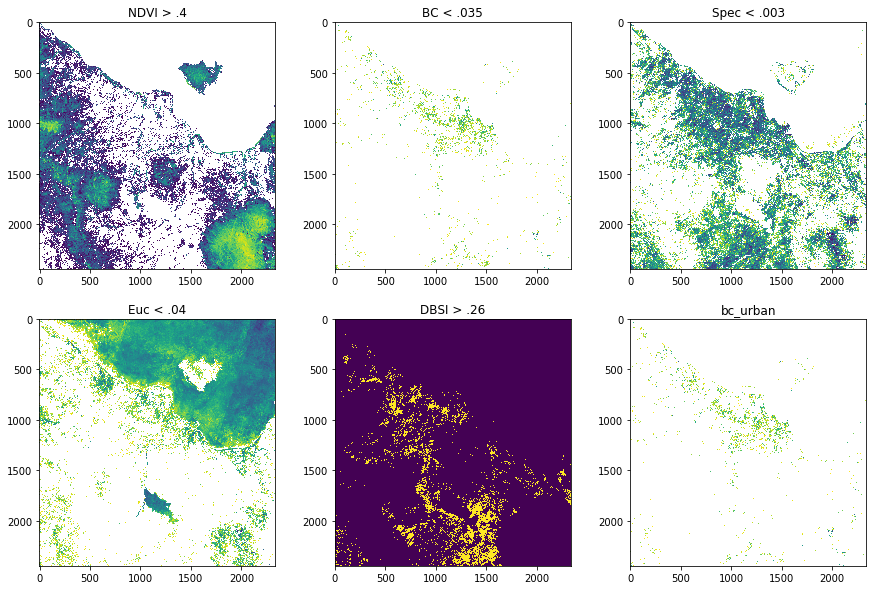

In [155]:
fig=plt.figure(figsize=(15, 10))
columns = 3
rows = 2
ax=fig.add_subplot(2, 3, 1)
ax.set_title("NDVI > .4")
ax.imshow(ndvi.where(ndvi > .4))
ax=fig.add_subplot(2, 3, 2)
ax.set_title("BC < .035")
ax.imshow(bc.where(bc < .035))
ax=fig.add_subplot(2, 3, 3)
ax.set_title("Spec < .003")
ax.imshow(spec.where(spec < .003))
ax=fig.add_subplot(2, 3, 4)
ax.set_title("Euc < .04")
ax.imshow(euc.where(euc < .04))
ax=fig.add_subplot(2, 3, 5)
ax.set_title("DBSI > .26")
ax.imshow(DBSI_bare)
ax=fig.add_subplot(2, 3, 6)
ax.set_title("bc_urban")
ax.imshow(bc_urban)
plt.show()



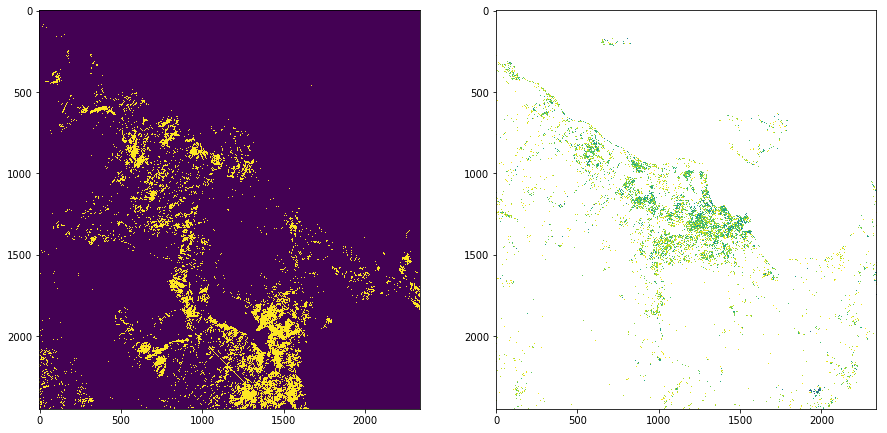

In [156]:
fig=plt.figure(figsize=(15, 15))
columns = 2
rows = 1
fig.add_subplot(1, 2, 1)
plt.imshow(DBSI_bare)
fig.add_subplot(1, 2, 2)
plt.imshow(mad_urb)
plt.show()

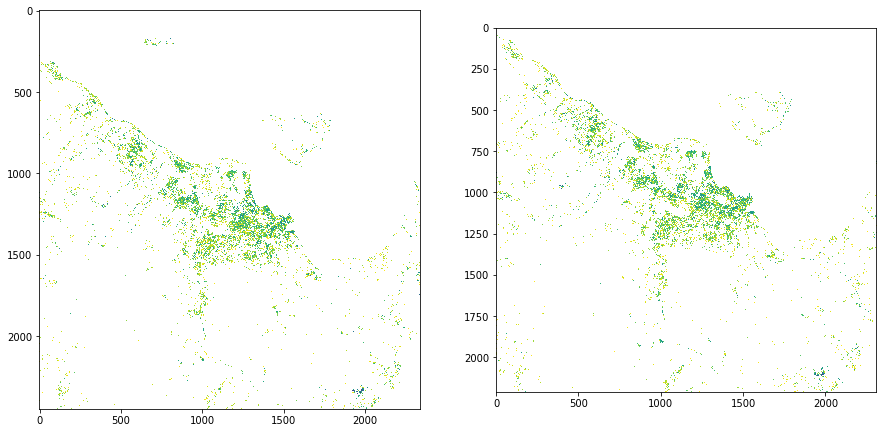

In [157]:
mad_urb2 = mad_urb.where(DBSI_bare < 1)

fig=plt.figure(figsize=(15, 15))
columns = 2
rows = 1
fig.add_subplot(1, 2, 1)
plt.imshow(mad_urb)
fig.add_subplot(1, 2, 2)
plt.imshow(mad_urb2)
plt.show()